# Кросс-валидация позволяет оценить производительность модели на различных подвыборках данных. Это помогает понять, насколько стабильно модель работает на новых данных.

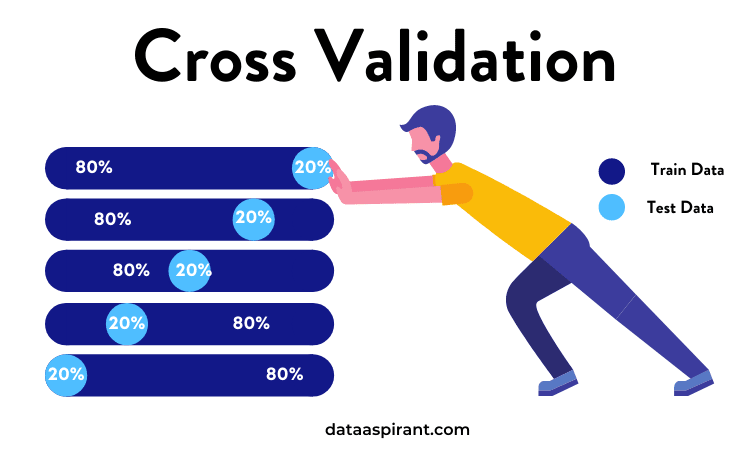

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier()

for cv in [3, 5, 7, 10]:
    cv_scores = cross_val_score(model, X, y, cv=cv) # cv shuffles data k-folds
    print(f"CV = {cv}: Mean Score = {cv_scores.mean()}")

CV = 3: Mean Score = 0.96
CV = 5: Mean Score = 0.96
CV = 7: Mean Score = 0.9465058750773035
CV = 10: Mean Score = 0.9666666666666666


In [3]:
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

scoring_methods = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

for metric_name, scoring in scoring_methods.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    print(f"Metric = {metric_name}: Mean Score = {cv_scores.mean()}")

Metric = accuracy: Mean Score = 0.96
Metric = f1: Mean Score = 0.9664818612187034
Metric = precision: Mean Score = 0.9634343434343435
Metric = recall: Mean Score = 0.9666666666666668
